<a href="https://colab.research.google.com/github/AliAramideh/Image_super_resolution/blob/main/Image_Super_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

---

In The Name Of God
<center>

# Author: **Ali Aramideh**

## Image Super Resolution using Autoencoder

1. Download the "image super resolution (from unsplash)" dataset and split it's validation set to new validation set and test set.
2. Design and train an AutoEncoder using `PyTorch` (not `TensorFlow`) on the dataset to enhance the resolution of images from low resolution to high resolution.
3. plot learning curve and visualize low resolution images of test set, their corresponding high resolution images and their reconstructed versions side by side.

### Import Necessary Libraries

In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms
from torchvision.datasets.folder import default_loader
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder, DatasetFolder
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import torchvision.transforms.functional as TF
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Load Dataset and Prepare It

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.hr_folder = os.path.join(root_dir, 'hr')
        self.lr_folder = os.path.join(root_dir, 'lr')
        self.hr_images = os.listdir(self.hr_folder)
        self.lr_images = os.listdir(self.lr_folder)

    def __len__(self):
        return len(self.hr_images)

    def __getitem__(self, index):
        hr_image_name = self.hr_images[index]
        lr_image_name = self.lr_images[index]
        hr_image_path = os.path.join(self.hr_folder, hr_image_name)
        lr_image_path = os.path.join(self.lr_folder, lr_image_name)

        hr_image = Image.open(hr_image_path).convert('RGB').resize((1200, 800))
        lr_image = Image.open(lr_image_path).convert('RGB').resize((1200, 800))

        if self.transform:
            hr_image = self.transform(hr_image)
            lr_image = self.transform(lr_image)

        return lr_image, hr_image

In [ ]:
root = 'E:\\projectP3\\Image Super Resolution - Unsplash\\super'

transform = transforms.Compose([transforms.ToTensor()])

dataset = CustomDataset(root_dir=root, transform=transform)

batch_size = 16

trainSize = int(0.9 * len(dataset))
testSize = len(dataset) - trainSize

trainSet, testSet = random_split(dataset, [trainSize, testSize])

trainLoader = DataLoader(trainSet, 64, shuffle=True)
test_loader = DataLoader(testSet, 64, shuffle=True)

### Define Your Model
torch neural network model $$//$$
Despite using RTX 3060 and colab, due to the size of images, the whole windows and colab crash due to the lack of ram. Please consider the largness of task on grading! $$//$$
Some tested models are below.


In [ ]:
import torch.nn as nn
class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU())


        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 3, kernel_size=3, stride=1, padding=1),
            nn.ReLU())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = SRCNN()
total_params = sum(p.numel() for p in model.parameters())
print(total_params)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)



6467


In [ ]:
import torch.nn as nn
class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU())


        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = SRCNN()
total_params = sum(p.numel() for p in model.parameters())
print(total_params)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
import torch.nn as nn
class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU())


        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = SRCNN()
total_params = sum(p.numel() for p in model.parameters())
print(total_params)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
import torch.nn as nn
class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU()
        )


        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 3, kernel_size=3, stride=1, padding=1),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = SRCNN()
total_params = sum(p.numel() for p in model.parameters())
print(total_params)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)



11011


### Fit The Model
Also Define optimizer, Criterion and other parameters $$//$$
Crashing after 3 epochs!


In [ ]:
criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

epoch_nums = 10## Number of epochs
n_total_steps = len(trainLoader)
for epoch in range(epoch_nums):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, (lowRes, highRes) in enumerate(trainLoader):
        ## FILL HERE
        ## You should train the model and also print the running loss for each batch
        lowRes =  lowRes.to(device)
        highRes = highRes.to(devicy
        output = model(lowRes)
        loss = criterion(output, highRes)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        torch.cuda.empty_cache()



        running_loss += loss.item()
    print(f"Epoch: {epoch+1} from Epoch {epoch_nums} loss: {running_loss/n_total_steps}")

print('Finished Training')

Epoch: 1 from Epoch 10 loss: 0.22647803525129953
Epoch: 2 from Epoch 10 loss: 0.19273865305715138
Epoch: 3 from Epoch 10 loss: 0.15837364312675264


KeyboardInterrupt: 

### Plot The Results

In [ ]:
hrImg = []
lrImg = []
upScaleImg = []
counter = 0
pred = None

testBatch = iter(test_loader)
lrIMG, hrIMG = testBatch.__next__()

for i in range(1):
    pred = model(lrIMG).detach().numpy()*255




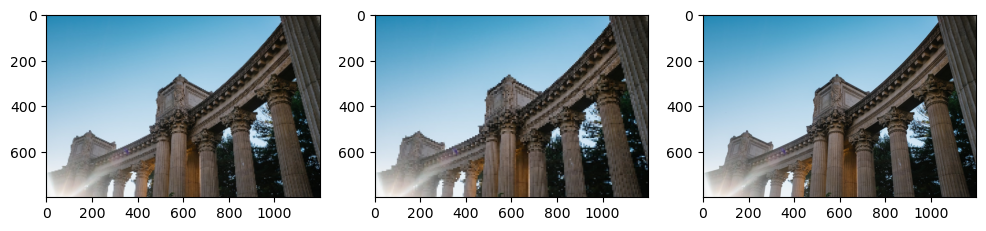

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(np.transpose(pred[2,:,:,:]/255, (1,2,0)))  # Convert BGR to RGB for correct color display

# Second subplot
plt.subplot(1, 3, 2)
plt.imshow(np.transpose(lr[2,:,:,:]/255, (1,2,0)))  # Convert BGR to RGB for correct color display

# Third subplot
plt.subplot(1, 3, 3)
plt.imshow(np.transpose(hr[2,:,:,:]/255, (1,2,0)))  # Convert BGR to RGB for correct color display

# Display the subplots
plt.show()

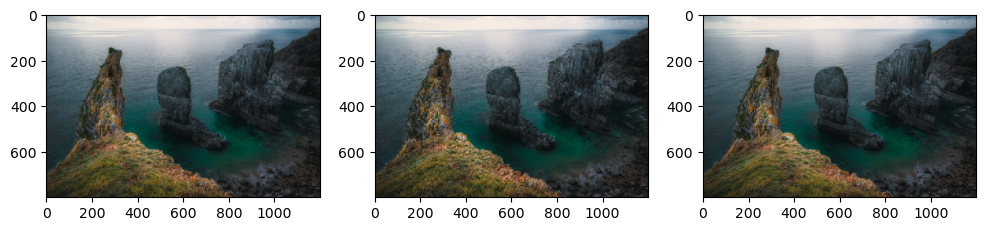

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(np.transpose(pred[0,:,:,:]/255, (1,2,0)))  # Convert BGR to RGB for correct color display

# Second subplot
plt.subplot(1, 3, 2)
plt.imshow(np.transpose(lr[0,:,:,:]/255, (1,2,0)))  # Convert BGR to RGB for correct color display

# Third subplot
plt.subplot(1, 3, 3)
plt.imshow(np.transpose(hr[0,:,:,:]/255, (1,2,0)))  # Convert BGR to RGB for correct color display

# Display the subplots
plt.show()